Pandas is a popular Python module that provides high performance data 
structures and data analysis tools. Pandas is widely used to transform 
raw data for data analysis and machine learning. We will learn: 

• data frames and data series 

• reading from files 

• data transformation 

• data visualization 

• statistical analysis

Wes McKinney developed on Pandas and open sourced it in 2009. Later Chang She become the primary contributor. 

# Data frames and Data series

## Data frames and Data series

### Data frames and Data series

Series - is a one-dimensional Python object that corresponds to one column 
in a table.

In [9]:
a = 1000
print(type(a))

print("+++++++++++++++++++++")

print(a)

<class 'int'>
+++++++++++++++++++++
1000


In [1]:
'''
First things first, let's import pandas
'''
import pandas as pd

Creating a data series from a list

In [10]:
list1 = ['Grapes', 'Apples', 'Oranges', 'Bananas']
s1 = pd.Series(list1)
print(s1, type(s1))

0     Grapes
1     Apples
2    Oranges
3    Bananas
dtype: object <class 'pandas.core.series.Series'>


Notice that rows are given numbers, these numbers are known as indices. Indices starts from 0 and go up.  

We can provide custom index as well. 

In [11]:
# defining list2 with indices
list2 = ['GR', 'AP', 'OR', 'BA']

# In series1 we say index=list2
series1 = pd.Series(list1, index=list2)
print(series1)

GR     Grapes
AP     Apples
OR    Oranges
BA    Bananas
dtype: object


In [9]:
list3 = [11, 12, 13, 14]


series2 = pd.Series(list1, index=list3)
print(series2)

11     Grapes
12     Apples
13    Oranges
14    Bananas
dtype: object


Now let us define a dictionary and convert it into a series.

In [12]:
d1 = {'Z': 'Zynga', 'U': 'Uber', 'G':'Google'}
ds1 = pd.Series(d1)
print(ds1)

Z     Zynga
U      Uber
G    Google
dtype: object


In [14]:
c1 = [12, 15, -19]
sc1 = pd.Series(c1)
print(sc1)

0    12
1    15
2   -19
dtype: int64


In [16]:
c1 = [12, 15, -19.0, 'Apple']
sc1 = pd.Series(c1)
print(sc1)

0       12
1       15
2      -19
3    Apple
dtype: object


Let's create a series with company name as index and its current stock price as 
value. Notice that in the code below, we have a dictionary with two keys 
having None as their values.

In [17]:
d2 = {'Amazon': 852, 'Nvidia': None, 'Alphabet': 856, 'Amazon':-1000}
print(d2)

{'Amazon': -1000, 'Nvidia': None, 'Alphabet': 856}


In [20]:
d2 = {'Amazon': 852, 'Nvidia': None, 'Alphabet': 856, 'Toyota': '112', \
    'GE': 29, 'Ford': 12, 'Marriot': None, 'amazon': 1000}

companies = pd.Series(d2, name='Price')

print(companies)

Amazon       852
Nvidia      None
Alphabet     856
Toyota       112
GE            29
Ford          12
Marriot     None
amazon      1000
Name: Price, dtype: object


Using the index we can get the corresponding stock prices. Below we are 
retrieving the stock price of Ford.

In [22]:
print(companies['Ford'])

12


In [21]:
print(companies[['Ford']])

Ford    12
Name: Price, dtype: object


We can also get stock prices for more companies. We have to supply the indices 
that we are interested in as a list.

In [24]:
print(companies[['Ford', 'GE', 'Marriot']])

Ford         12
GE           29
Marriot    None
Name: Price, dtype: object


Membership can be checked using the 'in' keyword.

In [25]:
print('Amazon' in companies)
print('Apple' in companies)

True
False


If we want to know companies for which we don't have stock price, then we have 
to use the isnull(). True will be returned for the indices that don't have a 
value and False for the indices that have 
a value.

In [28]:
print(companies)
print("+++++++++++++")
print(companies.isnull())

Amazon       852
Nvidia      None
Alphabet     856
Toyota       112
GE            29
Ford          12
Marriot     None
amazon      1000
Name: Price, dtype: object
+++++++++++++
Amazon      False
Nvidia       True
Alphabet    False
Toyota      False
GE          False
Ford        False
Marriot      True
amazon      False
Name: Price, dtype: bool


A dataframe is a tabular data structure that consists of rows and columns. 
Dataframe is nothing but a collection of series.

Let's create a dataframe using a dictionary as shown below.

In [40]:
c1= {'Name': ['Amazon', 'GE', 'Toyota', 'Twitter', 'Ford', 'Marriot'],
     'Founded': [1994, 1923, 1937, 2006, 1903, 1927], 
     'Price': [852, 111.2, 112, 15.2, 12.5, 88.31]}

companies = pd.DataFrame(c1, columns=['Name', 'Founded', 'Price'])

print(companies)

      Name  Founded   Price
0   Amazon     1994  852.00
1       GE     1923  111.20
2   Toyota     1937  112.00
3  Twitter     2006   15.20
4     Ford     1903   12.50
5  Marriot     1927   88.31


In [37]:
c1= {'Name': ['Amazon', 'GE', 'Toyota', 'Twitter', 'Ford', 'Marriot'],
            'Founded': [1994, 1923, 1937, 2006, 1903, 1927]}

companies = pd.DataFrame(c1)
print(companies)

      Name  Founded
0   Amazon     1994
1       GE     1923
2   Toyota     1937
3  Twitter     2006
4     Ford     1903
5  Marriot     1927


In [42]:
# let's change the column names

companies_2 = companies.rename(columns={'Founded':'Year'})
print(companies_2)

      Name  Year   Price
0   Amazon  1994  852.00
1       GE  1923  111.20
2   Toyota  1937  112.00
3  Twitter  2006   15.20
4     Ford  1903   12.50
5  Marriot  1927   88.31


In [45]:
print(id(companies_2))

2616896085512


In [43]:
# companies data frame doesn't change
print(companies)

      Name  Founded   Price
0   Amazon     1994  852.00
1       GE     1923  111.20
2   Toyota     1937  112.00
3  Twitter     2006   15.20
4     Ford     1903   12.50
5  Marriot     1927   88.31


In [46]:
print(id(companies))

2616896022024


In [47]:
"""
In-class activity: Create a data series which comprises of names of 6 
US capitals. Print the contents of the data series.
"""

x = ['Phoenix', 'Sacramento', 'Austin', 'Boise', 'Little Rock', 'Denver']
capitals = pd.Series(x)
print(capitals)

0        Phoenix
1     Sacramento
2         Austin
3          Boise
4    Little Rock
5         Denver
dtype: object


In [53]:
"""
In-class activity: To the above data series include state of 
each capital as an index. 
"""
# Method 1: using two lists to create a Series

cc = ['Phoenix', 'Sacramento', 'Austin', 'Boise', 'Little Rock', 'Denver']

s2 = pd.Series(cc, index=['AZ', 'CA', 'TX', 'ID', 'AK', 'CO'])
print(s2)

AZ        Phoenix
CA     Sacramento
TX         Austin
ID          Boise
AK    Little Rock
CO         Denver
dtype: object


In [14]:
# Method 2: using a dictionary to create a Series

cd = {'AZ': 'Phoenix', 'CA': 'Sacramento', 'TX': 'Austin', 'ID': 'Boise', 'AK': 'Little Rock', 'CO': 'Denver'}
scd = pd.Series(cd)
print(scd)

AZ              1
CA     Sacramento
TX         Austin
ID          Boise
AK    Little Rock
CO         Denver
dtype: object


## Reading files

Reading a csv file. 

In [17]:
movies = pd.read_csv('alldata\imdb_movie\movie_metadata.csv')

In [18]:
print(type(movies))

<class 'pandas.core.frame.DataFrame'>


In [19]:
print(movies)

      color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4       NaN        Doug Walker                     NaN       NaN   
...     ...                ...                     ...       ...   
5038  Color        Scott Smith                     1.0      87.0   
5039  Color                NaN                    43.0      43.0   
5040  Color   Benjamin Roberds                    13.0      76.0   
5041  Color        Daniel Hsia                    14.0     100.0   
5042  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David Moore   
1                       563.0    

In [20]:
movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [21]:
# head() will print the first 5 rows

print(movies.head())

   color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1               

In [22]:
movies.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [23]:
movies.tail()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
5042,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


In [24]:
movies.tail(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5033,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,...,371.0,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000
5034,Color,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,70071.0,Thriller,...,35.0,English,Philippines,Not Rated,7000.0,2005.0,0.0,6.3,NaN,74
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0
5036,Color,Anthony Vallone,NaN,84.0,2.0,2.0,John Considine,45.0,NaN,Crime|Drama,...,1.0,English,USA,PG-13,3250.0,2005.0,44.0,7.8,NaN,4
5037,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,...,14.0,English,USA,Not Rated,9000.0,2011.0,205.0,6.4,NaN,413
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
5042,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


In [25]:
print(movies.columns)

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')


In [26]:
print(movies.dtypes)

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [27]:
print(movies.shape)

(5043, 28)


In [28]:
# for number of rows use shape[0]
print(movies.shape[0])

5043


In [29]:
# for number of columns use shape[1]
print(movies.shape[1])

28


In [30]:
print(movies, type(movies))

      color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4       NaN        Doug Walker                     NaN       NaN   
...     ...                ...                     ...       ...   
5038  Color        Scott Smith                     1.0      87.0   
5039  Color                NaN                    43.0      43.0   
5040  Color   Benjamin Roberds                    13.0      76.0   
5041  Color        Daniel Hsia                    14.0     100.0   
5042  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David Moore   
1                       563.0    

We can create a series from the movies dataframe. 

In [31]:
movies_dir = movies['director_name']
print(movies_dir.head())

0        James Cameron
1       Gore Verbinski
2           Sam Mendes
3    Christopher Nolan
4          Doug Walker
Name: director_name, dtype: object


Let's create a new dataframe with columns: 
movie_title, duration, budget, gross, genres, director_name.

In [32]:
newmovies = movies[['movie_title', 'duration', 'budget', 'gross', 'genres', 'director_name']].copy(deep=True)
print(newmovies.head())

                                         movie_title  duration       budget  \
0                                            Avatar      178.0  237000000.0   
1          Pirates of the Caribbean: At World's End      169.0  300000000.0   
2                                           Spectre      148.0  245000000.0   
3                             The Dark Knight Rises      164.0  250000000.0   
4  Star Wars: Episode VII - The Force Awakens    ...       NaN          NaN   

         gross                           genres      director_name  
0  760505847.0  Action|Adventure|Fantasy|Sci-Fi      James Cameron  
1  309404152.0         Action|Adventure|Fantasy     Gore Verbinski  
2  200074175.0        Action|Adventure|Thriller         Sam Mendes  
3  448130642.0                  Action|Thriller  Christopher Nolan  
4          NaN                      Documentary        Doug Walker  


In [35]:
print(newmovies.shape)

(5043, 6)


We can use sort_values() to sort a dataframe.

In [36]:
print(newmovies.sort_values('director_name').head())

               movie_title  duration      budget       gross  \
4605  The Helix... Loaded       97.0   1000000.0         NaN   
4314               Circle       87.0         NaN         NaN   
3497              Get Low      100.0   7500000.0   9176553.0   
2182           Date Movie       85.0  20000000.0  48546578.0   
2909          The Funeral       99.0  12500000.0   1227324.0   

                                      genres    director_name  
4605  Action|Adventure|Comedy|Fantasy|Sci-Fi    A. Raven Cruz  
4314    Drama|Horror|Mystery|Sci-Fi|Thriller       Aaron Hann  
3497                           Drama|Mystery  Aaron Schneider  
2182                          Comedy|Romance    Aaron Seltzer  
2909                             Crime|Drama     Abel Ferrara  


In [38]:
newmovies.sort_values('director_name').head()

,movie_title,duration,budget,gross,genres,director_name
4605,The Helix... Loaded,97.0,1000000.0,NaN,Action|Adventure|Comedy|Fantasy|Sci-Fi,A. Raven Cruz
4314,Circle,87.0,NaN,NaN,Drama|Horror|Mystery|Sci-Fi|Thriller,Aaron Hann
3497,Get Low,100.0,7500000.0,9176553.0,Drama|Mystery,Aaron Schneider
2182,Date Movie,85.0,20000000.0,48546578.0,Comedy|Romance,Aaron Seltzer
2909,The Funeral,99.0,12500000.0,1227324.0,Crime|Drama,Abel Ferrara


Notice that not all values in our data frame are finite. So, now we want to drop 
rows that have NaN in any column. 

## Data Transformation

In [37]:
newmovies1 = newmovies.copy(deep=True) # making a deep copy
newmovies1.dropna(how='any', inplace=True) # dropping rows that have NaN anywhere inplace, so the newmovies1 gets modified

In [39]:
# what's a deep copy
nn = newmovies.copy(deep=True)
print(nn.shape, id(nn))

(5043, 6) 2104692967880


In [40]:
nn2 = nn.copy()
print(nn2.shape, id(nn2))

(5043, 6) 2104692962760


In [41]:
nn2.dropna(how='any', inplace=True)
print('Shape of nn2:', nn2.shape)
print('Shape of nn:', nn.shape)

Shape of nn2: (3890, 6)
Shape of nn: (5043, 6)


In [42]:
print(newmovies1.shape)

(3890, 6)


In [43]:
print(newmovies1.head())

                                 movie_title  duration       budget  \
0                                    Avatar      178.0  237000000.0   
1  Pirates of the Caribbean: At World's End      169.0  300000000.0   
2                                   Spectre      148.0  245000000.0   
3                     The Dark Knight Rises      164.0  250000000.0   
5                               John Carter      132.0  263700000.0   

         gross                           genres      director_name  
0  760505847.0  Action|Adventure|Fantasy|Sci-Fi      James Cameron  
1  309404152.0         Action|Adventure|Fantasy     Gore Verbinski  
2  200074175.0        Action|Adventure|Thriller         Sam Mendes  
3  448130642.0                  Action|Thriller  Christopher Nolan  
5   73058679.0          Action|Adventure|Sci-Fi     Andrew Stanton  


In [44]:
newmovies2 = newmovies.copy(deep=True)
newmovies2.dropna(subset=['duration','budget'], how='any', inplace=True)

In [45]:
print(newmovies2.head())

                                 movie_title  duration       budget  \
0                                    Avatar      178.0  237000000.0   
1  Pirates of the Caribbean: At World's End      169.0  300000000.0   
2                                   Spectre      148.0  245000000.0   
3                     The Dark Knight Rises      164.0  250000000.0   
5                               John Carter      132.0  263700000.0   

         gross                           genres      director_name  
0  760505847.0  Action|Adventure|Fantasy|Sci-Fi      James Cameron  
1  309404152.0         Action|Adventure|Fantasy     Gore Verbinski  
2  200074175.0        Action|Adventure|Thriller         Sam Mendes  
3  448130642.0                  Action|Thriller  Christopher Nolan  
5   73058679.0          Action|Adventure|Sci-Fi     Andrew Stanton  


In [46]:
print(newmovies2.shape)

(4546, 6)


In [47]:
new_gross = newmovies[newmovies['gross']>350000]
print(new_gross.shape)
print(new_gross.head())

(3759, 6)
                                 movie_title  duration       budget  \
0                                    Avatar      178.0  237000000.0   
1  Pirates of the Caribbean: At World's End      169.0  300000000.0   
2                                   Spectre      148.0  245000000.0   
3                     The Dark Knight Rises      164.0  250000000.0   
5                               John Carter      132.0  263700000.0   

         gross                           genres      director_name  
0  760505847.0  Action|Adventure|Fantasy|Sci-Fi      James Cameron  
1  309404152.0         Action|Adventure|Fantasy     Gore Verbinski  
2  200074175.0        Action|Adventure|Thriller         Sam Mendes  
3  448130642.0                  Action|Thriller  Christopher Nolan  
5   73058679.0          Action|Adventure|Sci-Fi     Andrew Stanton  


## Statistical Analysis

In [84]:
print(newmovies1.describe())

          duration        budget         gross
count  3890.000000  3.890000e+03  3.890000e+03
mean    109.896401  4.520391e+07  5.106809e+07
std      22.706775  2.224177e+08  6.980668e+07
min      34.000000  2.180000e+02  1.620000e+02
25%      95.000000  1.000000e+07  6.844452e+06
50%     106.000000  2.400000e+07  2.799697e+07
75%     120.000000  5.000000e+07  6.540649e+07
max     330.000000  1.221550e+10  7.605058e+08


We can find how many values in each column of newmovies has NAN using isnull().

In [48]:
print(newmovies.isnull().sum())

movie_title        0
duration          15
budget           492
gross            884
genres             0
director_name    104
dtype: int64


In [49]:
newmovies3 = newmovies.copy(deep=True)
newmovies3['duration'].fillna(value=90, inplace=True)
print(newmovies3.isnull().sum())

movie_title        0
duration           0
budget           492
gross            884
genres             0
director_name    104
dtype: int64


In [50]:
newmovies3['duration'].mean()

107.14991076740036

In [88]:
"""
In-class activity: From the movies data frame, create a new data 
frame that comprises of movie title, duration, budget and gross. 
1) Find the number of NaN in gross. 
2) Replace NaN in gross with the mean of gross.
"""

mymovies = movies[['movie_title', 'duration', 'budget', 'gross']].copy()
print(mymovies.head())
print('NaN in each column:', mymovies.isnull().sum())
grossmean = mymovies['gross'].mean()
print(grossmean)
mymovies['gross'].fillna(value=grossmean, inplace=True)
print('NaN after filling with gross mean:', mymovies.isnull().sum())

                                         movie_title  duration       budget  \
0                                            Avatar      178.0  237000000.0   
1          Pirates of the Caribbean: At World's End      169.0  300000000.0   
2                                           Spectre      148.0  245000000.0   
3                             The Dark Knight Rises      164.0  250000000.0   
4  Star Wars: Episode VII - The Force Awakens    ...       NaN          NaN   

         gross  
0  760505847.0  
1  309404152.0  
2  200074175.0  
3  448130642.0  
4          NaN  
NaN in each column: movie_title      0
duration        15
budget         492
gross          884
dtype: int64
48468407.52680933
NaN after filling with gross mean: movie_title      0
duration        15
budget         492
gross            0
dtype: int64


In [51]:
print(mymovies.describe())

NameError: name 'mymovies' is not defined

In [52]:
mymovies = movies[['movie_title', 'duration', 'budget', 'gross']].copy()
#print(mymovies.head())
print(mymovies.isnull().sum())
gmean = mymovies['gross'].mean()

print(gmean)

print(mymovies.describe())
print("++++++++++++++++++++++++++++")
mymovies['gross'].fillna(value=gmean, inplace=True)
print(mymovies.isnull().sum())

print(mymovies.describe())

movie_title      0
duration        15
budget         492
gross          884
dtype: int64
48468407.52680933
          duration        budget         gross
count  5028.000000  4.551000e+03  4.159000e+03
mean    107.201074  3.975262e+07  4.846841e+07
std      25.197441  2.061149e+08  6.845299e+07
min       7.000000  2.180000e+02  1.620000e+02
25%      93.000000  6.000000e+06  5.340988e+06
50%     103.000000  2.000000e+07  2.551750e+07
75%     118.000000  4.500000e+07  6.230944e+07
max     511.000000  1.221550e+10  7.605058e+08
++++++++++++++++++++++++++++
movie_title      0
duration        15
budget         492
gross            0
dtype: int64
          duration        budget         gross
count  5028.000000  4.551000e+03  5.043000e+03
mean    107.201074  3.975262e+07  4.846841e+07
std      25.197441  2.061149e+08  6.216318e+07
min       7.000000  2.180000e+02  1.620000e+02
25%      93.000000  6.000000e+06  8.460992e+06
50%     103.000000  2.000000e+07  3.743230e+07
75%     118.000000  4.5

### Reading content from a website

In [96]:
url= "https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv"
countries=pd.read_csv(url)

In [98]:
print(countries.head())
print(countries.shape)
print(countries.shape[0])

    Country  Region
0   Algeria  AFRICA
1    Angola  AFRICA
2     Benin  AFRICA
3  Botswana  AFRICA
4   Burkina  AFRICA
(194, 2)
194


In [99]:
print(countries.describe())

        Country  Region
count       194     194
unique      194       6
top     Andorra  AFRICA
freq          1      54


## Data Visualization 

The below line will make sure that the image created by the mathplot will be 
shown inside Jupyter notebook.

In [53]:
%matplotlib inline

Let us plot a histogram for duration time.

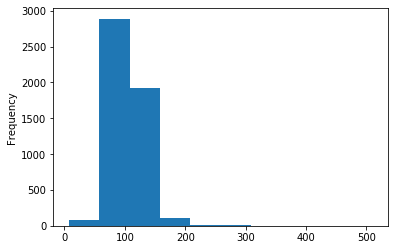

In [54]:
newmovies3.duration.plot(kind='hist')

Let's consider another dataset to understand different plotting choices. 

In [55]:
company = pd.read_csv('company.csv')
print(company.head())

  Name  sales_budget  marketing_budget  Income
0  PLP           123                90     400
1   MX           340                85     700
2   YP            45                55     210
3   UP            27                60     200
4   QT            80               100     225


In [56]:
company = pd.read_csv('company.csv')
company = company.set_index('Name')
print(company.head())

      sales_budget  marketing_budget  Income
Name                                        
PLP            123                90     400
MX             340                85     700
YP              45                55     210
UP              27                60     200
QT              80               100     225


We plot a scatter plot between the columns sales_budget and marketing_budget.

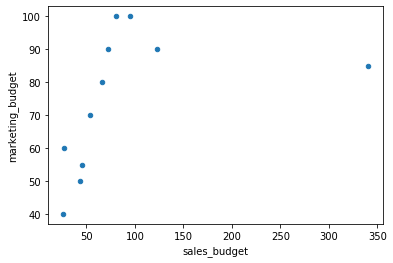

In [57]:
company.plot(kind='scatter', x='sales_budget', y='marketing_budget')

Creating a series with column sales_budget.

In [58]:
sales = company['sales_budget']
print(sales)

Name
PLP    123
MX     340
YP      45
UP      27
QT      80
AD      95
XC      26
MA      72
GP      66
LA      54
WT      43
Name: sales_budget, dtype: int64


Text(0, 0.5, 'Sales')

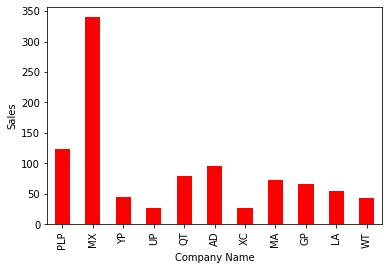

In [59]:
sales_plot = sales.plot(kind='bar', color='red')
sales_plot.set_xlabel("Company Name")
sales_plot.set_ylabel("Sales")

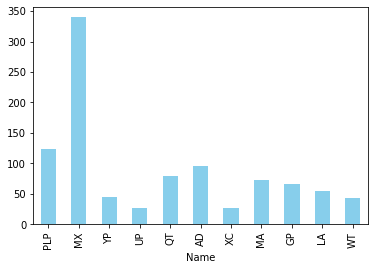

In [60]:
sales_plot = sales.plot(kind='bar', x="Company Name", y="Sales", color='skyblue')

Text(0, 0.5, 'Marketing Budget')

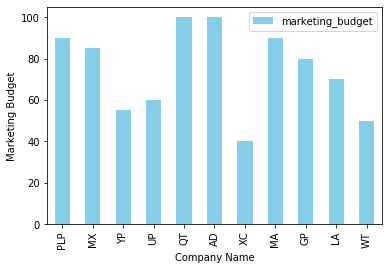

In [61]:
"""
In-class activity: Use the companies data frame and create a data 
series with company name and marketing budget. 
1) Create a bar graph with company name on the x-axis and 
marketing budget on the y-axis. 
"""

market_plot = company.plot(kind='bar', y="marketing_budget", color='skyblue')
market_plot.set_xlabel("Company Name")
market_plot.set_ylabel("Marketing Budget")